# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

##### The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
#Data reading and visaulizing tools
import numpy as np
import math
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#preprocessing tools
from sklearn.preprocessing import StandardScaler,OneHotEncoder, OrdinalEncoder, LabelEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.feature_selection import SelectFromModel, SequentialFeatureSelector
from sklearn.tree import export_text, plot_tree,export_graphviz

#models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#models performance evaulation tools
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

#additional tools
from sklearn.metrics.pairwise import polynomial_kernel, rbf_kernel

from sklearn import set_config
set_config(display='diagram')


In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

dropping duration column as this will not be present for prediction

In [6]:
df = df.drop(['duration'], axis=1)


<AxesSubplot:title={'center':'marital acceptance'}, xlabel='marital status', ylabel='no. of acceptance'>

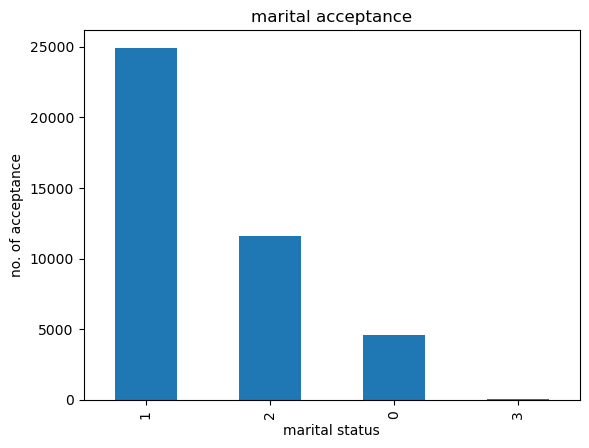

In [65]:
df['marital'].value_counts().plot(kind='bar', title="marital acceptance", xlabel='marital status', ylabel='no. of acceptance')


<AxesSubplot:>

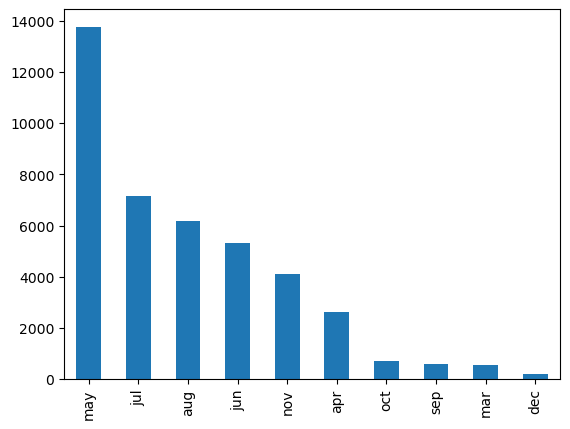

In [8]:
df['month'].value_counts().plot(kind='bar', title="monthly acceptance", xlabel='month', ylabel='no. of acceptance')


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

#### The goal is to increase efficiency of directed campaigns for long-term deposit subscriptions by reducing the number of contacts.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

Lets use LabelEncoder to categories like, job, marital, education

In [9]:
le = LabelEncoder()
df.marital = le.fit_transform(df.marital)
df.job = le.fit_transform(df.job)
df.education = le.fit_transform(df.education)



In [10]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,1,3,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,1,3,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,1,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,1,3,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [11]:
df.day_of_week.unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [12]:
oe = OrdinalEncoder()
df[["day_of_week"]] = oe.fit_transform(df[["day_of_week"]])
df[["month"]] = oe.fit_transform(df[["month"]])



In [13]:
transformer=make_column_transformer((OneHotEncoder(),make_column_selector(dtype_include='object')),
                                   remainder=StandardScaler())

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [14]:
X= df.drop(['y'], axis=1)
y=df['y']

In [15]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [17]:
lgr_pipe=Pipeline(
    steps=[('transformer',transformer),
           ('lrg',LogisticRegression(max_iter=1000))]
)

In [18]:
start_time = time.time()
lgr=lgr_pipe.fit(X_train,y_train)
end_time = time.time()
lgr_time = end_time - start_time

In [19]:
train_lgr_pred=lgr.predict(X_train)
test_lgr_pred=lgr.predict(X_test)

### Problem 9: Score the Model

What is the accuracy of your model?

In [20]:
print(classification_report(y_test,test_lgr_pred))

              precision    recall  f1-score   support

          no       0.91      0.99      0.95     10968
         yes       0.66      0.23      0.34      1389

    accuracy                           0.90     12357
   macro avg       0.79      0.61      0.64     12357
weighted avg       0.88      0.90      0.88     12357



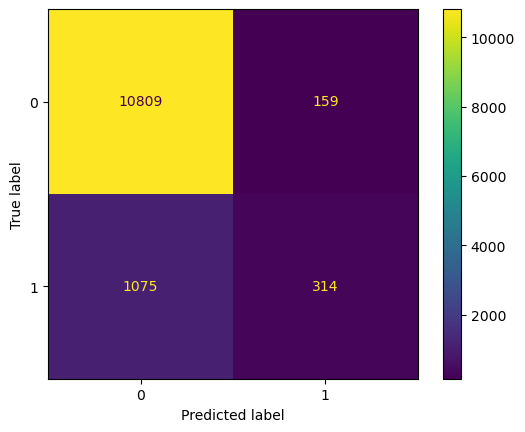

In [21]:
test_lgr_confusion=confusion_matrix(y_test,test_lgr_pred)
disp_test_dtree=ConfusionMatrixDisplay(test_lgr_confusion)
disp_test_dtree.plot()
plt.show()

In [22]:
lgr_test_accuracy_score=accuracy_score(test_lgr_pred,y_test)
lgr_train_accuracy_score=accuracy_score(train_lgr_pred,y_train)
lgr_test_accuracy_score, lgr_train_accuracy_score

(0.9001375738447843, 0.9003850022545177)

In [23]:
lgr_test_precision_score=precision_score(test_lgr_pred,y_test,average='weighted')
lgr_test_precision_score

0.956433462198081

In [24]:
lgr_test_recall_score=recall_score(test_lgr_pred,y_test,average='weighted')
lgr_test_recall_score

0.9001375738447843

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [25]:
#K nearst neighbor pipelines
knn_pipe=Pipeline(
    steps=[('transformer',transformer),
          ('knn', KNeighborsClassifier())]
)

#Decision tree pipelines
dtree_pipe=Pipeline(
    steps=[('transformer',transformer),
           ('dtree',DecisionTreeClassifier())]
)

#Support Vector Machine pipelines
svc_pipe=Pipeline(
    steps=[('transformer',transformer),
          ('svc',SVC())]
)

In [26]:
start_time = time.time()
knn=knn_pipe.fit(X_train,y_train)
end_time = time.time()
knn_time = end_time - start_time

In [27]:
train_knn_pred=knn.predict(X_train)
test_knn_pred=knn.predict(X_test)

In [28]:
knn_train_accurcy_score=accuracy_score(train_knn_pred,y_train)
knn_test_accuracy_score=accuracy_score(test_knn_pred,y_test)
knn_train_accurcy_score,knn_test_accuracy_score

(0.9124206583191703, 0.8898599983814842)

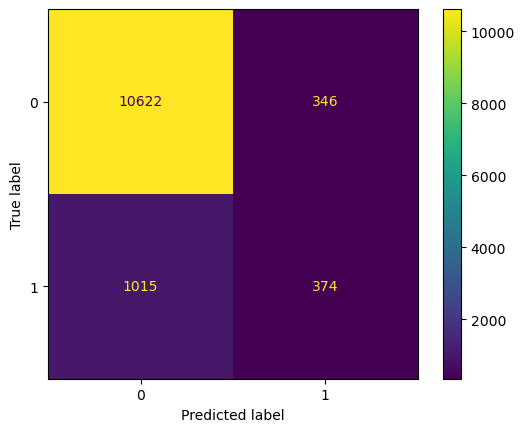

In [29]:
test_knn_confusion=confusion_matrix(y_test,test_knn_pred)
disp_test_dtree=ConfusionMatrixDisplay(test_knn_confusion)
disp_test_dtree.plot()
plt.show()

In [30]:
start_time = time.time()
dtree=dtree_pipe.fit(X_train,y_train)
end_time = time.time()
dtree_time = end_time - start_time

In [31]:
train_dtree_pred=dtree.predict(X_train)
test_dtree_pred=dtree.predict(X_test)

In [32]:
dtree_train_accuracy_score=accuracy_score(train_dtree_pred,y_train)
dtree_test_accuracy_score=accuracy_score(test_dtree_pred,y_test)
dtree_train_accuracy_score,dtree_test_accuracy_score

(0.9955950192501127, 0.8372582341992393)

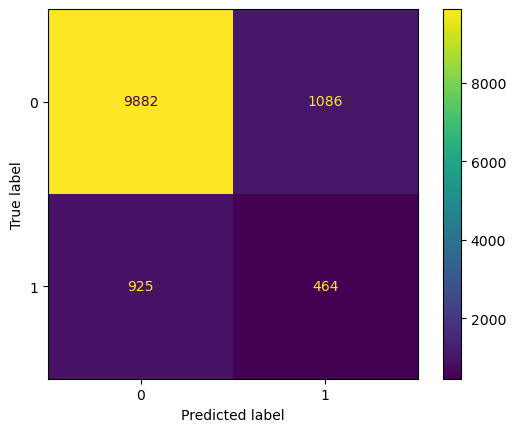

In [33]:
test_dtree_confusion=confusion_matrix(y_test,test_dtree_pred)
disp_test_dtree=ConfusionMatrixDisplay(test_dtree_confusion)
disp_test_dtree.plot()
plt.show()

In [34]:
start_time = time.time()
svc=svc_pipe.fit(X_train,y_train)
end_time = time.time()
svc_time = end_time - start_time

In [35]:
train_svc_pred=svc.predict(X_train)
test_svc_pred=svc.predict(X_test)

In [36]:
svc_train_accuracy_score=accuracy_score(train_svc_pred,y_train)
svc_test_accuracy_score=accuracy_score(test_svc_pred,y_test)
svc_train_accuracy_score,svc_test_accuracy_score

(0.9036800665949846, 0.9000566480537348)

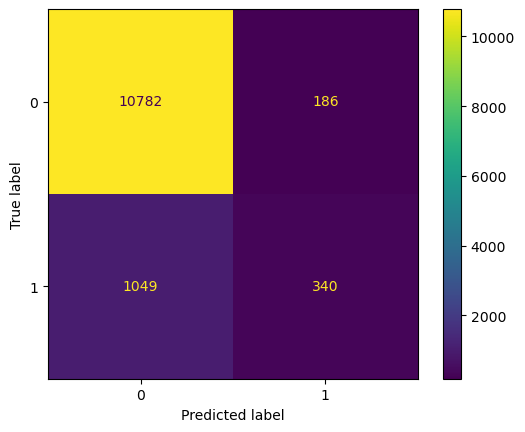

In [37]:
test_svc_confusion=confusion_matrix(y_test,test_svc_pred)
disp_test_dtree=ConfusionMatrixDisplay(test_svc_confusion)
disp_test_dtree.plot()
plt.show()

In [38]:
#precision score
model_perf = pd.DataFrame({'model':['KNN','Dtree','LGR','SVM'],
              'train_accuracy':[knn_train_accurcy_score,dtree_train_accuracy_score,lgr_train_accuracy_score,svc_train_accuracy_score],
              'test_accuracy ':[knn_test_accuracy_score,dtree_test_accuracy_score,lgr_test_accuracy_score,svc_test_accuracy_score],
              'train_time (sec)':[knn_time,dtree_time, lgr_time,svc_time]})
model_perf

,model,train_accuracy,test_accuracy,train_time (sec)
0,KNN,0.912421,0.889860,0.070544
1,Dtree,0.995595,0.837258,0.236313
2,LGR,0.900385,0.900138,0.328251
3,SVM,0.903680,0.900057,51.258050


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [39]:
# sns.pairplot(df, hue = 'y');
# plt.title('')

lets check if housing coulmn we should keep?

In [40]:
df['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [41]:
sum(df['housing']=='no'),sum(df['housing']=='yes'),sum(df['housing']=='unknown')

(18622, 21576, 990)

Housing has good distribution so it make sense to keeo it.

Lets check default column

In [42]:
df['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

<AxesSubplot:>

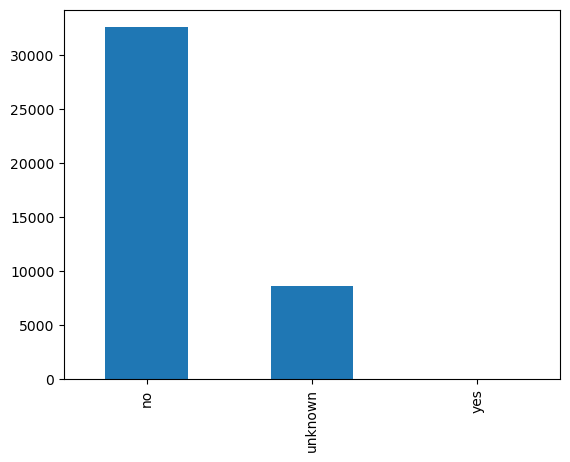

In [43]:
df['default'].value_counts().plot(kind='bar', title="Default acceptance", xlabel='Default status', ylabel='no. of acceptance')


I feel default column is not adding any value, data suggest that everyone in not defaulted or may be unknowm, lets drop it

In [44]:
df = df.drop(['default'], axis=1)


In [48]:
df['cons.conf.idx'].unique()

array([-36.4, -41.8, -42.7, -36.1, -40.4, -42. , -45.9, -50. , -47.1,
       -46.2, -40.8, -33.6, -31.4, -29.8, -26.9, -30.1, -33. , -34.8,
       -34.6, -40. , -39.8, -40.3, -38.3, -37.5, -49.5, -50.8])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   housing         41188 non-null  object 
 5   loan            41188 non-null  object 
 6   contact         41188 non-null  object 
 7   month           41188 non-null  float64
 8   day_of_week     41188 non-null  float64
 9   campaign        41188 non-null  int64  
 10  pdays           41188 non-null  int64  
 11  previous        41188 non-null  int64  
 12  poutcome        41188 non-null  object 
 13  emp.var.rate    41188 non-null  float64
 14  cons.price.idx  41188 non-null  float64
 15  cons.conf.idx   41188 non-null  float64
 16  euribor3m       41188 non-null  float64
 17  nr.employed     41188 non-null 

In [50]:
#logestic regression

lgr_params={
                'lrg__C':[0.001,.009,0.01,.09,1,5,10,25]}
#K nearst neibour hyperparamers dictionary
knn_params={'knn__n_neighbors':range(1,6,2),
        'knn__weights':['uniform','distance'],
        'knn__p':[1,2]}

#Decision tree hyperparamers dictionary
dtree_params = {'dtree__max_depth':[2,4,6,8],
                'dtree__min_samples_split':[0.1, 0.2, 0.05],
                'dtree__criterion': ['gini','entropy'],
                'dtree__min_samples_leaf':[1,2,3]}

#Support vector machine hyperparamers dictionary
# this is taking super long
# svc_params= {'svc__kernel': ['rbf','linear','sigmoid'],
#              'svc__gamma': [0.1, 1.0],
#              'svc__coef0':[1]}

svc_params= {'svc__kernel': ['rbf','linear','sigmoid']}


### GridSearchCV for each models

In [51]:
lgr_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'transformer', 'lrg', 'transformer__n_jobs', 'transformer__remainder__copy', 'transformer__remainder__with_mean', 'transformer__remainder__with_std', 'transformer__remainder', 'transformer__sparse_threshold', 'transformer__transformer_weights', 'transformer__transformers', 'transformer__verbose', 'transformer__verbose_feature_names_out', 'transformer__onehotencoder', 'transformer__onehotencoder__categories', 'transformer__onehotencoder__drop', 'transformer__onehotencoder__dtype', 'transformer__onehotencoder__handle_unknown', 'transformer__onehotencoder__sparse', 'lrg__C', 'lrg__class_weight', 'lrg__dual', 'lrg__fit_intercept', 'lrg__intercept_scaling', 'lrg__l1_ratio', 'lrg__max_iter', 'lrg__multi_class', 'lrg__n_jobs', 'lrg__penalty', 'lrg__random_state', 'lrg__solver', 'lrg__tol', 'lrg__verbose', 'lrg__warm_start'])

In [52]:
start_time = time.time()
lgr_grid=GridSearchCV(estimator=lgr_pipe,
                      param_grid=lgr_params,
                      cv=5)
lgr=lgr_grid.fit(X_train,y_train)
end_time = time.time()
lgr_time = end_time - start_time

In [53]:
train_lgr_pred=lgr.predict(X_train)
test_lgr_pred=lgr.predict(X_test)

In [54]:
lgr_train_accurcy_score=accuracy_score(train_lgr_pred,y_train)
lgr_test_accuracy_score=accuracy_score(test_lgr_pred,y_test)
lgr_train_accurcy_score,lgr_test_accuracy_score

(0.9009052755714335, 0.9000566480537348)

KNN

In [55]:
start_time = time.time()
knn_grid=GridSearchCV(estimator=knn_pipe,
                      param_grid=knn_params,
                      cv=5)
knn=knn_grid.fit(X_train,y_train)
end_time = time.time()
knn_time = end_time - start_time

In [56]:
train_knn_pred=knn.predict(X_train)
test_knn_pred=knn.predict(X_test)

In [57]:
knn_train_accurcy_score=accuracy_score(train_knn_pred,y_train)
knn_test_accuracy_score=accuracy_score(test_knn_pred,y_test)
knn_train_accurcy_score,knn_test_accuracy_score

(0.9142242724844785, 0.8913166626203771)

In [58]:
start_time = time.time()
dtree_grid=GridSearchCV(estimator=dtree_pipe,
                      param_grid=dtree_params,
                      cv=5)
dtree=dtree_grid.fit(X_train,y_train)
end_time = time.time()
dtree_time = end_time - start_time

In [59]:
train_dtree_pred=dtree.predict(X_train)
test_dtree_pred=dtree.predict(X_test)

In [60]:
dtree_train_accuracy_score=accuracy_score(train_dtree_pred,y_train)
dtree_test_accuracy_score=accuracy_score(test_dtree_pred,y_test)
dtree_train_accuracy_score,dtree_test_accuracy_score

(0.9002115778155457, 0.899166464352189)

In [61]:
start_time = time.time()
svc_grid=GridSearchCV(estimator=svc_pipe,
                      param_grid=svc_params,
                      cv=5)
svc=svc_grid.fit(X_train,y_train)
end_time = time.time()
svc_time = end_time - start_time

In [62]:
train_svc_pred=svc.predict(X_train)
test_svc_pred=svc.predict(X_test)

In [63]:
svc_train_accuracy_score=accuracy_score(train_svc_pred,y_train)
svc_test_accuracy_score=accuracy_score(test_svc_pred,y_test)
svc_train_accuracy_score,svc_test_accuracy_score

(0.9036800665949846, 0.9000566480537348)

In [64]:
#precision score with GridSearch
model_perf = pd.DataFrame({'model':['KNN','Dtree','LGR','SVM'],
              'train_accuracy':[knn_train_accurcy_score,dtree_train_accuracy_score,lgr_train_accuracy_score,svc_train_accuracy_score],
              'test_accuracy ':[knn_test_accuracy_score,dtree_test_accuracy_score,lgr_test_accuracy_score,svc_test_accuracy_score],
              'train_time (sec)':[knn_time,dtree_time, lgr_time,svc_time]})
model_perf

,model,train_accuracy,test_accuracy,train_time (sec)
0,KNN,0.914224,0.891317,205.259049
1,Dtree,0.900212,0.899166,43.205432
2,LGR,0.900385,0.900057,8.990946
3,SVM,0.903680,0.900057,826.374927


##### Questions

## Summary/Questions

Business Problem - The goal is to increase efficiency of directed campaigns for long-term deposit subscriptions by reducing the number of contacts.

I first analyzed and clean the data, used LabelEncoder and OrdinalEncoder to encode some of the categorial columns, and for rest used OneHotEncoder.

I dropped default and duration column, the reason to drop default was that data it had was imbalanced, and duration because, we will not have duration for predection ever.

After that I splitted the data for traininhg and testing. I created 4 models with defaulyt values for KNN, DTree, logestic regression and SVM. I see that highest test accuracy is with Logestic regression and SVM, KNN was also comparable, but training time for SVM was really high and for KNN it was really low. Based on this I would go with logestic regression but data sample is really small so we need to run these models with more data before concluding. Here is the result

    model	train_accuracy	test_accuracy	train_time (sec)
0	KNN	0.912421	0.889860	0.070544
1	Dtree	0.995595	0.837258	0.236313
2	LGR	0.900385	0.900138	0.328251
3	SVM	0.903680	0.900057	51.258050


I then used GridSearch for hyper parameter tuning and did the training and testing again, below are the results. All models have comparable test accuracy, but training time had huge varriance, SVM and KNN took long time (I had to remove some of the parameters to make it finish on time). Logestic regression finished in only 9 sec.


	model	train_accuracy	test_accuracy	train_time (sec)
0	KNN	0.914224	0.891317	205.259049
1	Dtree	0.900212	0.899166	43.205432
2	LGR	0.900385	0.900057	8.990946
3	SVM	0.903680	0.900057	826.374927